<a href="https://colab.research.google.com/github/Dollie1330/DAA1-algorithm-efficiency-mini-project/blob/main/DAA_LAB_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import time
import numpy as np
import matplotlib.pyplot as plt
import random
import sys

# Simple timing function
def time_it(func, *args, repeats=3, **kwargs):
    times = []
    for _ in range(repeats):
        start = time.perf_counter()
        func(*args, **kwargs)
        end = time.perf_counter()
        times.append(end - start)
    return sorted(times)[len(times)//2]  # median


In [4]:
# 1. Fibonacci Recursive
def fib_recursive(n):
    if n <= 1:
        return n
    return fib_recursive(n-1) + fib_recursive(n-2)

# 2. Fibonacci DP (Fast)
def fib_dp(n):
    if n <= 1:
        return n
    a, b = 0, 1
    for _ in range(2, n+1):
        a, b = b, a + b
    return b

# 3. Merge Sort
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr)//2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    merged = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            merged.append(left[i]); i += 1
        else:
            merged.append(right[j]); j += 1
    merged.extend(left[i:])
    merged.extend(right[j:])
    return merged

# 4. Quick Sort
def quick_sort(arr):
    a = arr[:]
    def partition(arr, low, high):
        pivot = arr[high]
        i = low
        for j in range(low, high):
            if arr[j] <= pivot:
                arr[i], arr[j] = arr[j], arr[i]
                i += 1
        arr[i], arr[high] = arr[high], arr[i]
        return i

    def qs(arr, low, high):
        if low < high:
            pi = partition(arr, low, high)
            qs(arr, low, pi - 1)
            qs(arr, pi + 1, high)

    qs(a, 0, len(a)-1)
    return a

# 5. Insertion Sort
def insertion_sort(arr):
    a = arr[:]
    for i in range(1, len(a)):
        key = a[i]
        j = i-1
        while j >= 0 and a[j] > key:
            a[j+1] = a[j]
            j -= 1
        a[j+1] = key
    return a

# 6. Bubble Sort
def bubble_sort(arr):
    a = arr[:]
    n = len(a)
    for i in range(n):
        swapped = False
        for j in range(0, n-1-i):
            if a[j] > a[j+1]:
                a[j], a[j+1] = a[j+1], a[j]
                swapped = True
        if not swapped:
            break
    return a

# 7. Selection Sort
def selection_sort(arr):
    a = arr[:]
    n = len(a)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if a[j] < a[min_idx]:
                min_idx = j
        a[i], a[min_idx] = a[min_idx], a[i]
    return a

# 8. Binary Search
def binary_search(arr, target):
    lo, hi = 0, len(arr)-1
    while lo <= hi:
        mid = (lo + hi)//2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            lo = mid + 1
        else:
            hi = mid - 1
    return -1


In [5]:
def generate_random_list(n):
    return [random.randint(0, 10**6) for _ in range(n)]


In [6]:
def run_sort_experiment(alg, sizes):
    results = []
    for n in sizes:
        arr = generate_random_list(n)
        t = time_it(alg, arr)
        results.append((n, t))
        print(f"{alg.__name__} | n={n} → time={t:.5f}s")
    return results


In [7]:
def plot_results(results, title):
    x = [r[0] for r in results]
    y = [r[1] for r in results]

    plt.plot(x, y, marker='o')
    plt.xlabel("Input Size (n)")
    plt.ylabel("Time (seconds)")
    plt.title(title)
    plt.grid(True)
    plt.show()


merge_sort | n=100 → time=0.00021s
merge_sort | n=500 → time=0.00086s
merge_sort | n=1000 → time=0.00216s
merge_sort | n=2000 → time=0.00391s
merge_sort | n=5000 → time=0.01126s


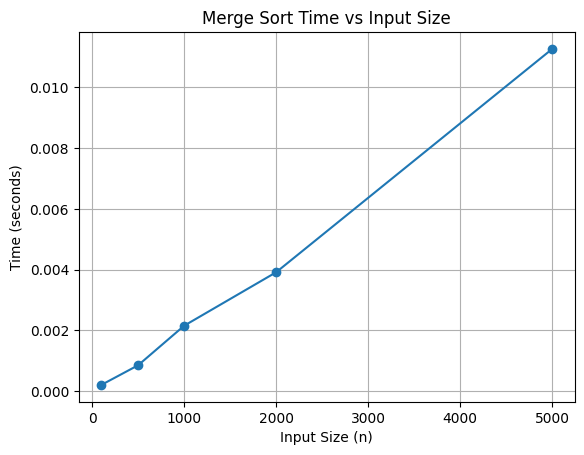

In [8]:
sizes = [100, 500, 1000, 2000, 5000]
res_merge = run_sort_experiment(merge_sort, sizes)
plot_results(res_merge, "Merge Sort Time vs Input Size")


quick_sort | n=100 → time=0.00007s
quick_sort | n=500 → time=0.00046s
quick_sort | n=1000 → time=0.00105s
quick_sort | n=2000 → time=0.00351s
quick_sort | n=5000 → time=0.00657s


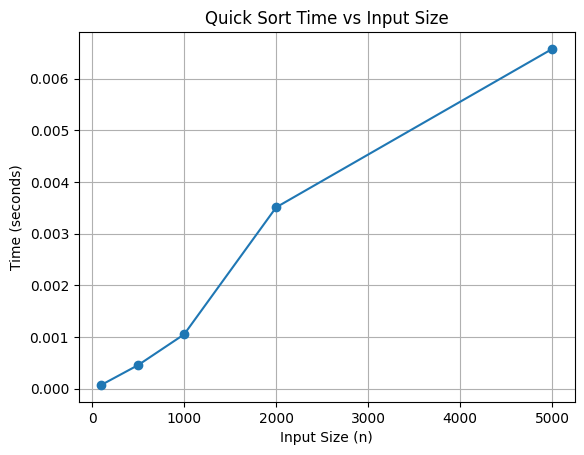

In [9]:
res_quick = run_sort_experiment(quick_sort, sizes)
plot_results(res_quick, "Quick Sort Time vs Input Size")


insertion_sort | n=100 → time=0.00021s
insertion_sort | n=300 → time=0.00252s
insertion_sort | n=500 → time=0.00483s
insertion_sort | n=800 → time=0.01391s
insertion_sort | n=1200 → time=0.03382s


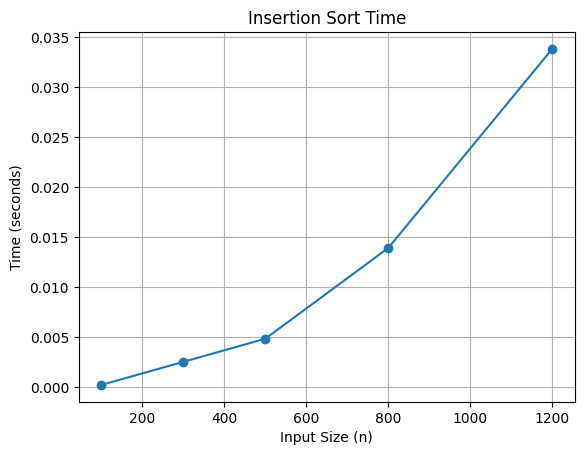

bubble_sort | n=100 → time=0.00038s
bubble_sort | n=300 → time=0.00335s
bubble_sort | n=500 → time=0.01184s
bubble_sort | n=800 → time=0.03130s
bubble_sort | n=1200 → time=0.07374s


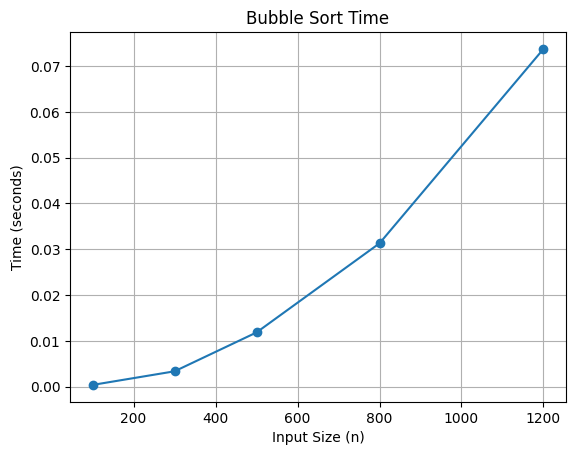

selection_sort | n=100 → time=0.00030s
selection_sort | n=300 → time=0.00192s
selection_sort | n=500 → time=0.00582s
selection_sort | n=800 → time=0.01894s
selection_sort | n=1200 → time=0.03520s


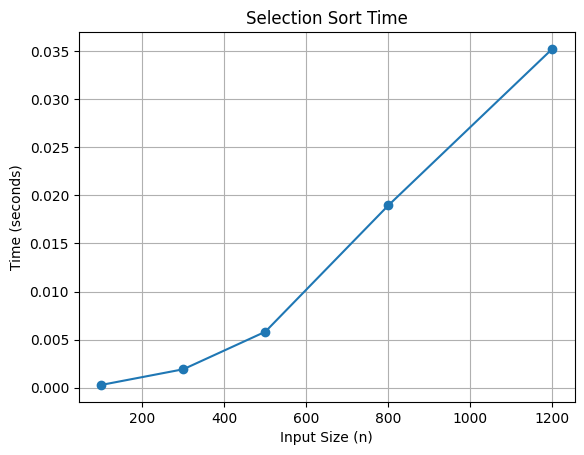

In [10]:
small_sizes = [100, 300, 500, 800, 1200]

res_insert = run_sort_experiment(insertion_sort, small_sizes)
plot_results(res_insert, "Insertion Sort Time")

res_bubble = run_sort_experiment(bubble_sort, small_sizes)
plot_results(res_bubble, "Bubble Sort Time")

res_select = run_sort_experiment(selection_sort, small_sizes)
plot_results(res_select, "Selection Sort Time")


fib_recursive(5) = time 0.0000s
fib_recursive(10) = time 0.0000s
fib_recursive(20) = time 0.0014s
fib_recursive(25) = time 0.0166s
fib_recursive(30) = time 0.1634s


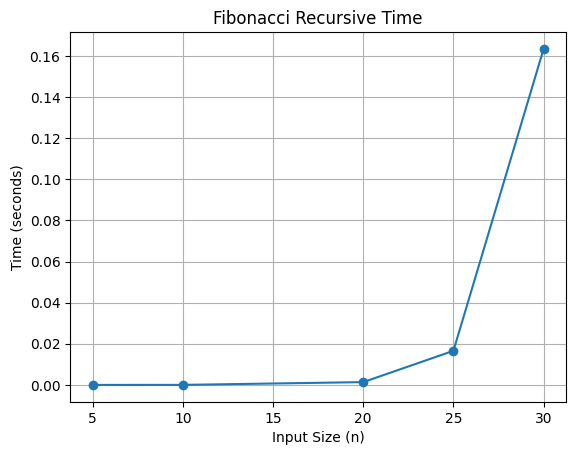

fib_dp(1000) = time 0.000073s
fib_dp(5000) = time 0.000603s
fib_dp(10000) = time 0.002223s
fib_dp(20000) = time 0.007492s
fib_dp(50000) = time 0.033027s


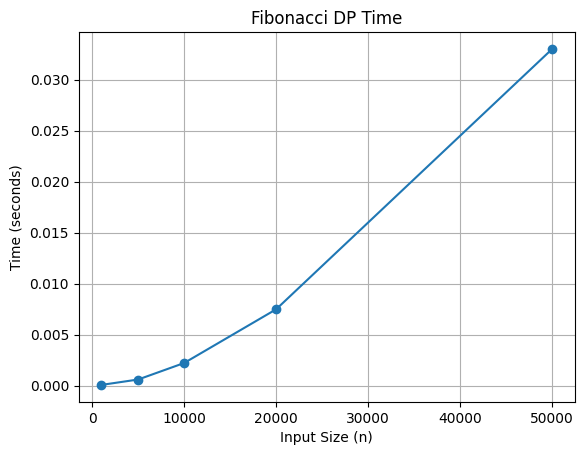

In [11]:
# Recursive for small n only
fib_small = [5, 10, 20, 25, 30]

res_fib_rec = []
for n in fib_small:
    t = time_it(fib_recursive, n)
    res_fib_rec.append((n, t))
    print(f"fib_recursive({n}) = time {t:.4f}s")

plot_results(res_fib_rec, "Fibonacci Recursive Time")


# DP version
fib_large = [1000, 5000, 10000, 20000, 50000]

res_fib_dp = []
for n in fib_large:
    t = time_it(fib_dp, n)
    res_fib_dp.append((n, t))
    print(f"fib_dp({n}) = time {t:.6f}s")

plot_results(res_fib_dp, "Fibonacci DP Time")


Binary Search | n=1000 → time=0.000005s
Binary Search | n=5000 → time=0.000004s
Binary Search | n=10000 → time=0.000004s
Binary Search | n=50000 → time=0.000006s
Binary Search | n=100000 → time=0.000006s


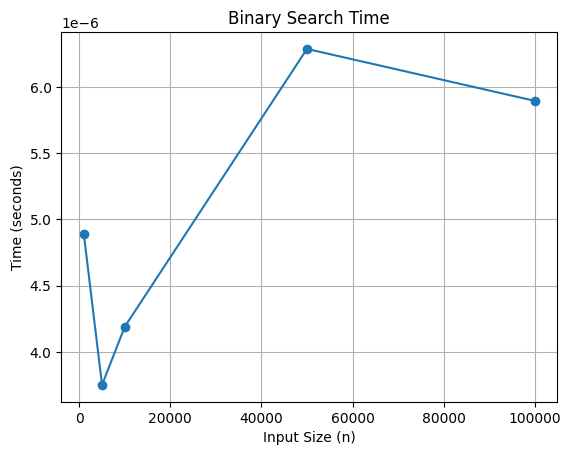

In [12]:
sizes_bs = [1000, 5000, 10000, 50000, 100000]
res_bs = []

for n in sizes_bs:
    arr = sorted(generate_random_list(n))
    t = time_it(binary_search, arr, arr[-1])  # search last element
    res_bs.append((n, t))
    print(f"Binary Search | n={n} → time={t:.6f}s")

plot_results(res_bs, "Binary Search Time")
